# Objective 1.3  -  Specific Relationships

- The association of **sleep duration with BMI and blood pressure**

- The impact of **income and education on cholesterol levels and obesity risk**

- The relationship between **sleep duration, socioeconomic factors (income and education), and diabetes risk**

### Step 1: Import and Set Up

***Environment Setup and Library Imports***

I imported the main libraries for data analysis and visualization, including pandas, numpy, matplotlib, seaborn, plotly, and statsmodels. To access project-specific modules, I added the project root folder to the Python path.

Then, I imported important directory paths and a helper function from the project’s config and utility scripts.

Finally, I configured pandas to display all columns when showing dataframes, making it easier to view the full dataset during analysis.

Now everything is ready to start working.

In [1]:
# Setup environment and imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Add project root (parent of 'scripts') to sys.path
current_dir = Path().resolve() 
project_root = current_dir.parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from scripts.config import (
    FINAL_DATA_DIR,
    SUMMARY_DIR,
    PLOTS_DIR   
)

from scripts.utils import pretty_path, explore_data

# Display full columns in pandas
pd.set_option('display.max_columns', None)

print("Setup complete.")


Setup complete.


### STEP 2: Load the complete merged NHANES Dataset

***Loading the Final Merged NHANES Dataset***

I loaded the cleaned and merged NHANES dataset from a CSV file into a pandas DataFrame. Before loading, I checked to make sure the file exists to avoid errors. After loading, I displayed the first few rows and the shape of the DataFrame to get a quick look at the data structure and size.

In [2]:
# Read the csv file into the dataframe

file_path = FINAL_DATA_DIR / "final_merged_nhanes_dataset.csv"
if not file_path.exists():
    raise FileNotFoundError(f"File not found: {file_path}")
df = pd.read_csv(file_path)

# preview the first few rows of a DataFrame.
display(df.head())

# size of the dataframe
display(df.shape)



,participant_id,age,gender,race_ethnicity,education_level,poverty_income_ratio,pir_category,interview_sample_weight,psu,strata,has_health_insurance,sleep_avg_hr,sleep_category,activity_level,total_weekly_min,hei_score,diet_score_category,total_diet_weight,food_item_weight,bmi,obese,systolic_avg,diastolic_avg,bp_category,total_cholesterol,blood_drawn_sample_weight,cholesterol_category,fasting_glucose_mg_dl,fasting_subsample_weight,glucose_category,hypoglycemia_flag,hyperglycemia_flag,log_fasting_glucose_mg_dl,diabetes_dx,diabetes_meds,diabetes_meds_cat,diabetes_status,congestive_heart_failure,coronary_heart_disease,angina,heart_attack,any_cvd,exam_sample_weight
0,130378,43,Male,Non-Hispanic Asian,College graduate or above,5.00,Very High,50055.450807,2.0,173.0,Yes,9.357143,Long Sleep,Low active,135.0,41.572532,Poor,61366.555827,6.750321e+05,27.0,0.0,132.666667,96.000000,Hypertension Stage 2,264.0,56042.129410,High,113.0,120025.308444,Prediabetes,0.0,0.0,4.727388,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,54374.463898
1,130379,66,Male,Non-Hispanic White,College graduate or above,5.00,Very High,29087.450605,2.0,173.0,Yes,9.000000,Normal Sleep,Moderately active,180.0,70.282500,Needs Improvement,34638.056480,5.888470e+05,33.5,1.0,117.000000,78.666667,Normal,214.0,37435.705647,Borderline high,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,34084.721548
2,130380,44,Female,Other Hispanic,High school/GED,1.41,Mid,80062.674301,1.0,174.0,Yes,8.285714,Normal Sleep,Low active,20.0,56.099703,Poor,84728.261560,1.101467e+06,29.7,0.0,109.000000,78.333333,Normal,187.0,85328.844519,Desirable,156.0,145090.773569,Diabetes,0.0,1.0,5.049856,1.0,1.0,Taking meds,1.0,0.0,0.0,0.0,0.0,0,81196.277992
3,130386,34,Male,Mexican American,Some college/AA degree,1.33,Mid,30995.282610,1.0,179.0,Yes,7.642857,Normal Sleep,Low active,30.0,36.878689,Poor,82013.365563,7.381203e+05,30.2,1.0,115.000000,73.666667,Normal,183.0,44526.214135,Desirable,100.0,82599.618089,Prediabetes,0.0,0.0,4.605170,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,39988.452940
4,130387,68,Female,Non-Hispanic White,College graduate or above,1.32,Mid,19896.970559,1.0,181.0,Yes,3.571429,Short Sleep,NaN,NaN,53.563152,Poor,20032.615949,4.206849e+05,42.6,1.0,141.333333,76.000000,Hypertension Stage 2,203.0,22746.296353,Borderline high,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,20776.254850


(6064, 43)

***Exploring the Final Merged NHANES Dataset***

I began by exploring the final merged NHANES dataset, which brings together all relevant participant information — including demographics, lifestyle behaviors, dietary patterns, and health indicators like BMI.

This step helps verify that the data is clean, complete, and ready for analysis. By reviewing the structure, missing values, and basic distributions, I ensured that the dataset is in good shape for running meaningful models and visualizations.

In [3]:
# Explore and Understand the full merged NHANES Data
print("Exploring final merged NHANES data..")
explore_data(df)

Exploring final merged NHANES data..

--- Exploring Dataset ---
Shape: (6064, 43)

First 5 rows:
   participant_id  age  gender      race_ethnicity            education_level  \
0          130378   43    Male  Non-Hispanic Asian  College graduate or above   
1          130379   66    Male  Non-Hispanic White  College graduate or above   
2          130380   44  Female      Other Hispanic            High school/GED   
3          130386   34    Male    Mexican American     Some college/AA degree   
4          130387   68  Female  Non-Hispanic White  College graduate or above   

   poverty_income_ratio pir_category  interview_sample_weight  psu  strata  \
0                  5.00    Very High             50055.450807  2.0   173.0   
1                  5.00    Very High             29087.450605  2.0   173.0   
2                  1.41          Mid             80062.674301  1.0   174.0   
3                  1.33          Mid             30995.282610  1.0   179.0   
4                  1.32   

### STEP 3: Data analysis and visualization

###  1a. Sleep Duration (sleep_avg_hr - continuous variable)- BMI and Blood Pressure

***Analyzing the Relationship Between Sleep Duration, BMI, and Blood Pressure***

I filtered the dataset to include only rows with complete data on sleep hours, BMI, blood pressure, and sample weights. Then, I ran weighted least squares (WLS) regression models to explore how sleep duration relates to BMI, systolic blood pressure, and diastolic blood pressure, accounting for the survey’s sample weights. Because the data came from a complex survey and had only two primary sampling units (PSUs), I couldn’t fully adjust for clustering the usual way. So, I used HC3 robust standard errors to help make the results more reliable, especially given the design limitations. I saved detailed model summaries to text files. Finally, I visualized the data with scatter plots, LOWESS smoothers, and regression lines side by side, and saved the combined figure as a PNG file.

Rows available for Sleep duration with BMI and BP modeling: 5735
                            WLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.003
Model:                            WLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.02
Date:                Tue, 29 Jul 2025   Prob (F-statistic):            0.00155
Time:                        20:45:10   Log-Likelihood:                -19982.
No. Observations:                5735   AIC:                         3.997e+04
Df Residuals:                    5733   BIC:                         3.998e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

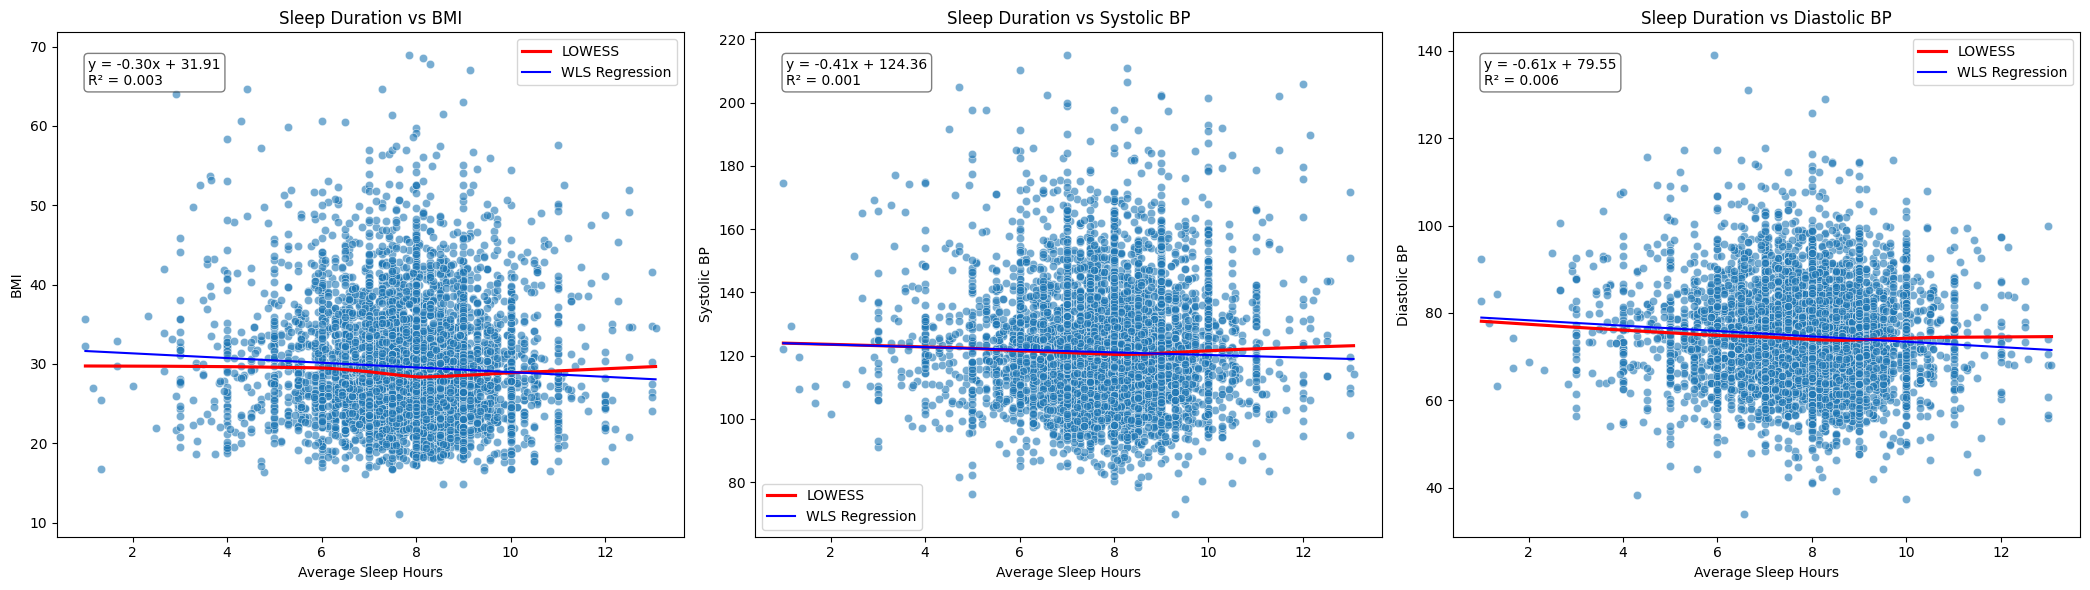

In [4]:
# Step 1: Filter data
sleep_df = df[
    df[['sleep_avg_hr', 'bmi', 'systolic_avg', 'diastolic_avg', 'exam_sample_weight']].notnull().all(axis=1)
].copy()

print("Rows available for Sleep duration with BMI and BP modeling:", len(sleep_df))

# Step 2: Fit WLS Models
model_bmi = smf.wls('bmi ~ sleep_avg_hr', data=sleep_df, weights=sleep_df['exam_sample_weight']).fit(cov_type='HC3')
model_sbp = smf.wls('systolic_avg ~ sleep_avg_hr', data=sleep_df, weights=sleep_df['exam_sample_weight']).fit(cov_type='HC3')
model_dbp = smf.wls('diastolic_avg ~ sleep_avg_hr', data=sleep_df, weights=sleep_df['exam_sample_weight']).fit(cov_type='HC3')

# Save model summaries
summary_paths = {
    "bmi": SUMMARY_DIR / "obj_1.3_sleep_duration_and_bmi_specific_relationship_summary.txt",
    "sbp": SUMMARY_DIR / "obj_1.3_sleep_duration_and_systolic_bP_specific_relationship_summary.txt",
    "dbp": SUMMARY_DIR / "obj_1.3_sleep_duration_and_diastolic_bP_specific_relationship_summary.txt"
}
with open(summary_paths["bmi"], 'w') as f: f.write(model_bmi.summary().as_text())
with open(summary_paths["sbp"], 'w') as f: f.write(model_sbp.summary().as_text())
with open(summary_paths["dbp"], 'w') as f: f.write(model_dbp.summary().as_text())

print(model_bmi.summary())
print(model_sbp.summary())
print(model_dbp.summary())


# Step 3: Visualization
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

def plot_combo(ax, x, y, model, title, y_label):
    # Scatter
    sns.scatterplot(data=sleep_df, x=x, y=y, ax=ax, alpha=0.6)
    
    # LOWESS smoother
    sns.regplot(data=sleep_df, x=x, y=y, lowess=True, scatter=False, ax=ax, color='red', label='LOWESS')
    
    # WLS regression line
    x_vals = np.linspace(sleep_df[x].min(), sleep_df[x].max(), 100)
    y_pred = model.params.Intercept + model.params[x] * x_vals
    ax.plot(x_vals, y_pred, color='blue', label='WLS Regression')

    # Add regression equation and R²
    r_squared = model.rsquared
    equation = f"y = {model.params[x]:.2f}x + {model.params.Intercept:.2f}"
    ax.text(0.05, 0.95, f"{equation}\nR² = {r_squared:.3f}", transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

    ax.set_title(title)
    ax.set_xlabel("Average Sleep Hours")
    ax.set_ylabel(y_label)
    ax.legend()

plot_combo(axes[0], 'sleep_avg_hr', 'bmi', model_bmi, "Sleep Duration vs BMI", "BMI")
plot_combo(axes[1], 'sleep_avg_hr', 'systolic_avg', model_sbp, "Sleep Duration vs Systolic BP", "Systolic BP")
plot_combo(axes[2], 'sleep_avg_hr', 'diastolic_avg', model_dbp, "Sleep Duration vs Diastolic BP", "Diastolic BP")

plt.tight_layout()
plot_path = PLOTS_DIR / "obj_1.3_sleep_vs_bmi_bp_specific_relationship_plot.png"
plt.savefig(plot_path)
plt.show()
plt.close()



### 1b. Sleep Duration (sleep_category - categorial variable)- BMI and Blood Pressure

***Modeling BMI and Blood Pressure by Sleep Category Adjusting for Age, Gender, and Race***

I started by defining age, gender, and race/ethnicity as key confounders, since they can influence both sleep and health outcomes. After filtering the data to include only complete cases, I used weighted regression models to look at how different sleep duration categories — short, normal, and long — relate to BMI, systolic blood pressure, and diastolic blood pressure. I treated sleep duration as a categorical variable, using 'Normal Sleep' as the reference group. To make sure the survey design was accounted for, I applied the sample weights in the models and used HC3 robust standard errors to improve the reliability of the results, especially since we couldn’t fully adjust for clustering due to the small number of PSUs. I saved all the model summaries into a text file for review.


In [5]:

# Define confounders 
confounders = ['age', 'gender', 'race_ethnicity']

# Prepare data — drop rows with missing values in any variable used
sleep_bmi_df = df[['bmi', 'sleep_category', 'exam_sample_weight'] + confounders].dropna()

print("sleep_bmi_df shape:", sleep_bmi_df.shape)
print("Columns used:\n", sleep_bmi_df.head())
print(sleep_bmi_df['sleep_category'].unique())

# Set reference category for sleep_category 
sleep_bmi_df['sleep_category'] = pd.Categorical(
    sleep_bmi_df['sleep_category'],
    categories=['Normal Sleep', 'Short Sleep', 'Long Sleep'],  
    ordered=True
)

# Model BMI with confounders
formula_bmi = 'bmi ~ C(sleep_category, Treatment(reference="Normal Sleep")) + age + gender + C(race_ethnicity)'
sleep_bmi_model = smf.wls(
    formula=formula_bmi,
    data=sleep_bmi_df,
    weights=sleep_bmi_df['exam_sample_weight']
).fit(cov_type='HC3')

print("Improved Sleep category and BMI regression model summary: \n", sleep_bmi_model.summary())

# Sleep → BP models
sleep_bp_df = df[['systolic_avg', 'diastolic_avg', 'sleep_category', 'exam_sample_weight'] + confounders].dropna()

sleep_bp_df['sleep_category'] = pd.Categorical(
    sleep_bp_df['sleep_category'],
    categories=['Normal Sleep', 'Short Sleep', 'Long Sleep'],
    ordered=True
)

formula_sbp = 'systolic_avg ~ C(sleep_category, Treatment(reference="Normal Sleep")) + age + gender + C(race_ethnicity)'
sleep_sbp_model = smf.wls(
    formula=formula_sbp,
    data=sleep_bp_df,
    weights=sleep_bp_df['exam_sample_weight']
).fit(cov_type='HC3')

print("Improved Sleep category and Systolic BP regression model summary: \n", sleep_sbp_model.summary())

formula_dbp = 'diastolic_avg ~ C(sleep_category, Treatment(reference="Normal Sleep")) + age + gender + C(race_ethnicity)'
sleep_dbp_model = smf.wls(
    formula=formula_dbp,
    data=sleep_bp_df,
    weights=sleep_bp_df['exam_sample_weight']
).fit(cov_type='HC3')

print("Improved Sleep category and Diastolic BP regression model summary: \n", sleep_dbp_model.summary())

# === Save regression summaries to a text file ===
file_path = SUMMARY_DIR / "obj_1.3_sleep_category_bmi_bp_specific_relationship_regression_summary.txt"

with file_path.open("w") as f:
    # BMI model summary
    f.write("### Sleep Category and BMI Regression Model Summary ###\n")
    f.write(sleep_bmi_model.summary().as_text())
    f.write("\n\n")

    # Systolic BP model summary
    f.write("### Sleep Category and Systolic BP Regression Model Summary ###\n")
    f.write(sleep_sbp_model.summary().as_text())
    f.write("\n\n")

    # Diastolic BP model summary
    f.write("### Sleep Category and Diastolic BP Regression Model Summary ###\n")
    f.write(sleep_dbp_model.summary().as_text())
    f.write("\n\n")

print(f"All sleep category BMI and BP specific relationship regression summaries saved to:", {pretty_path(file_path)})


sleep_bmi_df shape: (5897, 6)
Columns used:
     bmi sleep_category  exam_sample_weight  age  gender      race_ethnicity
0  27.0     Long Sleep        54374.463898   43    Male  Non-Hispanic Asian
1  33.5   Normal Sleep        34084.721548   66    Male  Non-Hispanic White
2  29.7   Normal Sleep        81196.277992   44  Female      Other Hispanic
3  30.2   Normal Sleep        39988.452940   34    Male    Mexican American
4  42.6    Short Sleep        20776.254850   68  Female  Non-Hispanic White
['Long Sleep' 'Normal Sleep' 'Short Sleep']
Improved Sleep category and BMI regression model summary: 
                             WLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.039
Model:                            WLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     31.02
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.40e-53


### 1b. Sleep Duration (sleep_category - categorial variable)- BMI and Blood Pressure - visualization

***Adjusted Predicted BMI and Blood Pressure by Sleep Category with 95% Confidence Intervals***

This code calculates predicted mean values of BMI, systolic BP, and diastolic BP for each sleep category (Normal, Short, Long) using the weighted regression models adjusted for age, gender, and race/ethnicity. It generates 95% confidence intervals for these predictions and combines the results into a single dataframe. Then, it creates a grouped bar plot showing predicted values and their confidence intervals for all three outcomes side-by-side across sleep categories. Error bars and numeric value labels are added to enhance clarity. The final plot is saved as a high-resolution PNG.

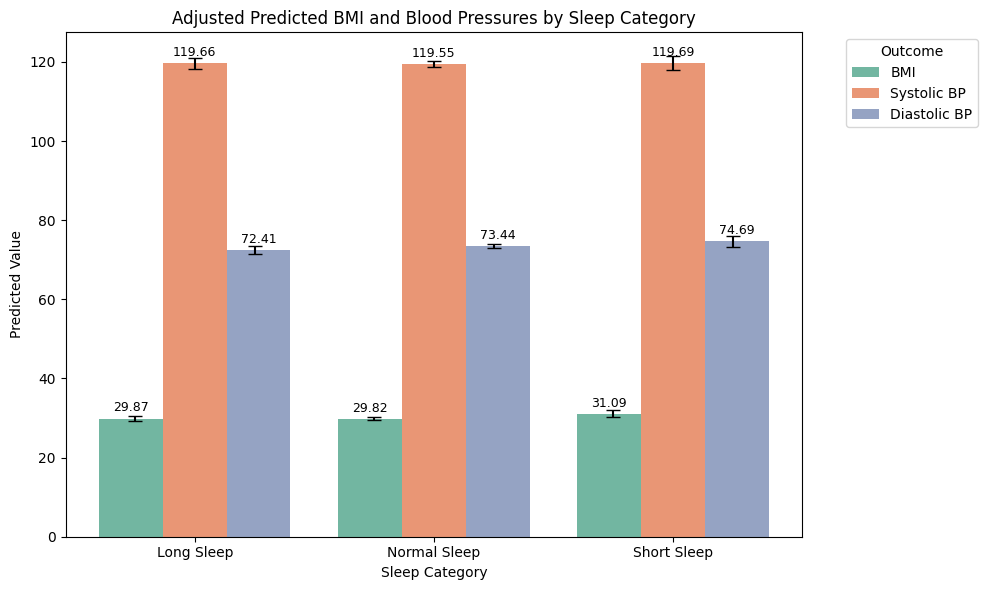

All sleep category BMI and BP specific relationship regression plot saved to: {'outputs\\plots\\obj_1.3_bmi_bp_sleep_category_specific_relationship_plot.png'}


In [6]:
def get_predicted_means_with_ci(model, df, category_col):
    """Get predicted means and 95% CI by category."""
    categories = df[category_col].cat.categories
    pred_df = pd.DataFrame({category_col: categories})
    
    # For confounders, set at mean or mode
    pred_df['age'] = df['age'].mean()
    pred_df['gender'] = df['gender'].mode()[0]
    pred_df['race_ethnicity'] = df['race_ethnicity'].mode()[0]

    # Predict with confidence intervals
    predictions = model.get_prediction(pred_df)
    pred_summary = predictions.summary_frame(alpha=0.05)

    pred_df['predicted'] = pred_summary['mean']
    pred_df['ci_lower'] = pred_summary['mean_ci_lower']
    pred_df['ci_upper'] = pred_summary['mean_ci_upper']
    return pred_df[[category_col, 'predicted', 'ci_lower', 'ci_upper']]


bmi_pred_df = get_predicted_means_with_ci(sleep_bmi_model, sleep_bmi_df, 'sleep_category')
sbp_pred_df = get_predicted_means_with_ci(sleep_sbp_model, sleep_bp_df, 'sleep_category')
dbp_pred_df = get_predicted_means_with_ci(sleep_dbp_model, sleep_bp_df, 'sleep_category')

# Rename columns for clarity before merge
bmi_pred_df = bmi_pred_df.rename(columns={'predicted': 'BMI', 'ci_lower': 'BMI_lower', 'ci_upper': 'BMI_upper'})
sbp_pred_df = sbp_pred_df.rename(columns={'predicted': 'Systolic BP', 'ci_lower': 'SBP_lower', 'ci_upper': 'SBP_upper'})
dbp_pred_df = dbp_pred_df.rename(columns={'predicted': 'Diastolic BP', 'ci_lower': 'DBP_lower', 'ci_upper': 'DBP_upper'})

# Merge predictions into one DataFrame
plot_df = bmi_pred_df[['sleep_category', 'BMI', 'BMI_lower', 'BMI_upper']].merge(
    sbp_pred_df[['sleep_category', 'Systolic BP', 'SBP_lower', 'SBP_upper']],
    on='sleep_category'
).merge(
    dbp_pred_df[['sleep_category', 'Diastolic BP', 'DBP_lower', 'DBP_upper']],
    on='sleep_category'
)

# Melt for seaborn plotting
plot_melt = plot_df.melt(id_vars='sleep_category', 
                         value_vars=['BMI', 'Systolic BP', 'Diastolic BP'],
                         var_name='Outcome', value_name='Predicted Value')

# Melt CIs for error bars
ci_lower = plot_df.melt(id_vars='sleep_category', value_vars=['BMI_lower', 'SBP_lower', 'DBP_lower'])
ci_upper = plot_df.melt(id_vars='sleep_category', value_vars=['BMI_upper', 'SBP_upper', 'DBP_upper'])

# Map outcome names for error bars to match plot_melt
ci_lower['Outcome'] = ci_lower['variable'].replace({'BMI_lower':'BMI', 'SBP_lower':'Systolic BP', 'DBP_lower':'Diastolic BP'})
ci_upper['Outcome'] = ci_upper['variable'].replace({'BMI_upper':'BMI', 'SBP_upper':'Systolic BP', 'DBP_upper':'Diastolic BP'})

ci_lower = ci_lower.rename(columns={'value': 'ci_lower'})
ci_upper = ci_upper.rename(columns={'value': 'ci_upper'})

# Merge CIs into main plot DataFrame
plot_melt = plot_melt.merge(ci_lower[['sleep_category', 'Outcome', 'ci_lower']], on=['sleep_category', 'Outcome'])
plot_melt = plot_melt.merge(ci_upper[['sleep_category', 'Outcome', 'ci_upper']], on=['sleep_category', 'Outcome'])

# Ensure 'sleep_category' is categorical for .cat accessor usage
plot_melt['sleep_category'] = plot_melt['sleep_category'].astype('category')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_melt, x='sleep_category', y='Predicted Value', hue='Outcome', palette='Set2', errorbar=None)

# Add error bars manually
for i, row in plot_melt.iterrows():
    x = list(plot_melt['sleep_category'].cat.categories).index(row['sleep_category']) + \
        (['BMI', 'Systolic BP', 'Diastolic BP'].index(row['Outcome']) - 1) * 0.25  # position adjustment
    plt.errorbar(
        x=x,
        y=row['Predicted Value'],
        yerr=[[row['Predicted Value'] - row['ci_lower']], [row['ci_upper'] - row['Predicted Value']]],
        fmt='none',
        c='black',
        capsize=5
    )

# FIXED: Add value labels on top of bars, but skip near-zero values
for p in ax.patches:
    height = p.get_height()
    if height >= 0.01:  # Skip labeling very small bars
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 3), textcoords='offset points')

plt.title('Adjusted Predicted BMI and Blood Pressures by Sleep Category')
plt.xlabel('Sleep Category')
plt.ylabel('Predicted Value')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_path = PLOTS_DIR / "obj_1.3_bmi_bp_sleep_category_specific_relationship_plot.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"All sleep category BMI and BP specific relationship regression plot saved to:", {pretty_path(plot_path)})


### 2. Model 1- how Poverty-Income Ratio (PIR) and Education Level influence Cholesterol levels (total_cholesterol)
- Check if income(PIR) and education levels are associated with cholesterol.

***Relationship Between Poverty Income Ratio, Education Level, and Total Cholesterol: Weighted Regression and Grouped Bar Visualization***

I ran an analysis to see how total cholesterol levels differ across groups based on Poverty Income Ratio (PIR) and education level. I used a weighted least squares (WLS) regression model that accounts for the survey’s sample weights, so the results better reflect the broader population. Because some of the usual methods for adjusting standard errors didn’t apply well to this dataset — like clustering, due to having only two primary sampling units — I used something called HC3 robust standard errors instead. This method helps give more reliable estimates even when there’s some variation in how consistent the data is. I compared cholesterol levels across PIR categories — Low, Mid, High, and Very High — and across education levels, excluding any missing data. The results are visualized in a grouped bar chart with average cholesterol levels and standard deviation error bars. I also added rotated labels to each bar showing the mean values, to make comparisons easier. The final plot was saved for reporting.

Rows available for PIR + Education vs Cholesterol modeling: 5498
                            WLS Regression Results                            
Dep. Variable:      total_cholesterol   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.346
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           9.23e-10
Time:                        20:45:12   Log-Likelihood:                -28979.
No. Observations:                5498   AIC:                         5.798e+04
Df Residuals:                    5489   BIC:                         5.804e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

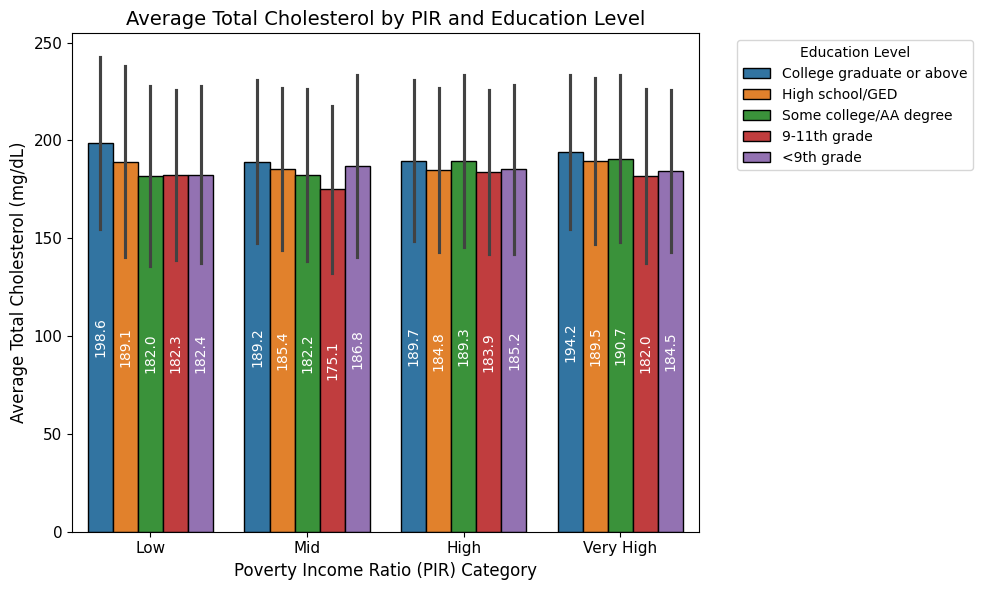

Cholestrol PIR education specific relationship plots saved to outputs\plots\obj_1.3_chol_vs_pir_edu_bar_plot.png


In [7]:
# --- Step 1: Filter relevant data ---
chol_df = df[
    df[['total_cholesterol', 'pir_category', 'education_level', 'blood_drawn_sample_weight', 'psu']].notnull().all(axis=1)
].copy()

print("Rows available for PIR + Education vs Cholesterol modeling:", len(chol_df))

# --- Step 2: Fit WLS Model ---
model_chol = smf.wls(
    'total_cholesterol ~ pir_category + C(education_level)', 
    data=chol_df, 
    weights=chol_df['blood_drawn_sample_weight']
).fit(cov_type='HC3')

print(model_chol.summary())

# Save model summary
summary_path = SUMMARY_DIR / "obj_1.3_pir_education_vs_cholesterol_summary.txt"
with open(summary_path, 'w') as f:
    f.write(model_chol.summary().as_text())

print(f"Model summary saved to {pretty_path(summary_path)}")

# --- Step 3: Grouped Bar Chart with Vertically Centered, Rotated Labels ---

# Define PIR category order
pir_order = ['Low', 'Mid', 'High', 'Very High']

# Filter valid PIR categories and exclude "Missing" education level
chol_df_plot = chol_df[
    (chol_df['pir_category'].isin(pir_order)) &
    (chol_df['education_level'] != 'Missing')
]

# Print group sizes for validation
print(chol_df_plot.groupby(['pir_category', 'education_level']).size())

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=chol_df_plot,
    x='pir_category',
    y='total_cholesterol',
    hue='education_level',
    order=pir_order,
    errorbar='sd', 
    edgecolor='black'
)


plt.title("Average Total Cholesterol by PIR and Education Level", fontsize=14)
plt.xlabel("Poverty Income Ratio (PIR) Category", fontsize=12)
plt.ylabel("Average Total Cholesterol (mg/dL)", fontsize=12)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Add vertically rotated value labels at vertical center of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 1:
        ax.annotate(
            f'{height:.1f}',
            (p.get_x() + p.get_width() / 2, height / 2),
            ha='center',
            va='center',
            fontsize=10,
            color='white',
            rotation=90,  
            xytext=(0, 0),
            textcoords='offset points'
        )

# Save plot
plot_path = PLOTS_DIR / "obj_1.3_chol_vs_pir_edu_bar_plot.png"
plt.savefig(plot_path)
plt.show()
plt.close()

print(f"Cholestrol PIR education specific relationship plots saved to {pretty_path(plot_path)}")


### 2. Model 2: how Poverty-Income Ratio (PIR) and Education Level influence Obesity (BMI ≥ 30)

***Predicted Probability of Obesity by Poverty Income Ratio and Education Level: Logistic Regression Analysis and Visualization***

This analysis models the probability of obesity based on Poverty Income Ratio (PIR) categories and education levels, using a weighted logistic regression that accounts for the survey’s sampling weights. I filtered out rows with missing values or unclear education responses to keep the analysis clean and valid. Because the data structure didn’t support clustering adjustments—due to only having two primary sampling units—I used HC3 robust standard errors to help improve the reliability of the standard error estimates. The model predicts adjusted obesity probabilities across all valid PIR and education combinations. I visualized the results using a grouped bar chart that shows predicted obesity rates by PIR and education level, with value labels added to make the differences easy to interpret. Both the regression output and the plot were saved for reporting.

Final rows for cholesterol and obesity modeling: 5967
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obese   No. Observations:                 5967
Model:                            GLM   Df Residuals:             241867146.18
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6089e+08
Date:                Tue, 29 Jul 2025   Deviance:                   3.2179e+08
Time:                        20:45:12   Pearson chi2:                 2.42e+08
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

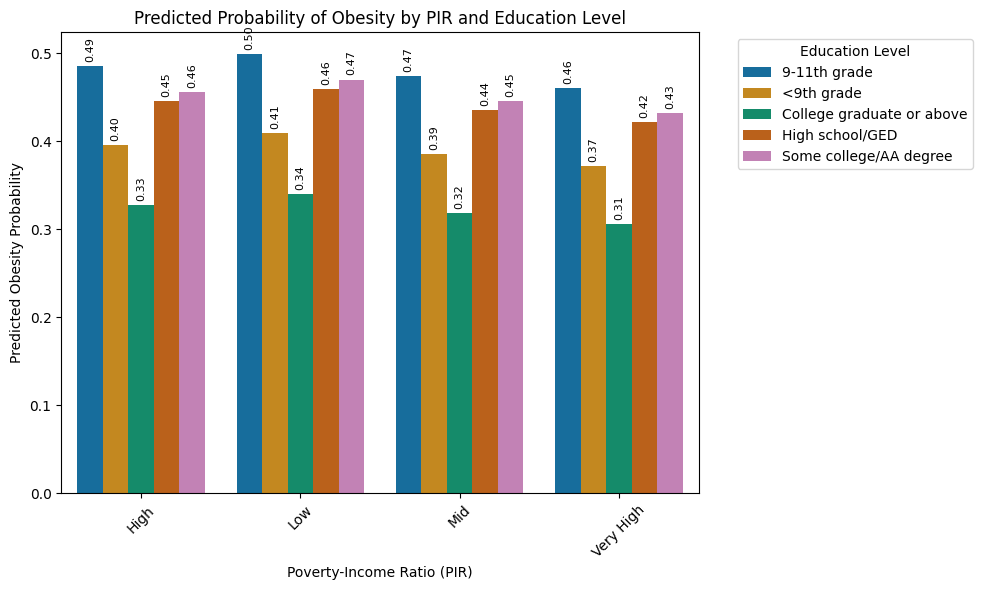

obesity probability by pir edu specific relationship plot saved to: outputs\plots\obj_1.3_obesity_probability_by_pir_edu_specific_relationship_plot.png


In [8]:

# Step 1: Data Preparation

# Drop rows with missing values in relevant columns
obese_data = df[['pir_category', 'education_level', 'exam_sample_weight', 'obese']].dropna()

# Drop 'Missing' education level to avoid 0.00 bars
obese_data = obese_data[obese_data['education_level'] != 'Missing']

# Ensure PIR and education are treated as categorical
obese_data['pir_category'] = obese_data['pir_category'].astype('category')
obese_data['education_level'] = obese_data['education_level'].astype('category')

print(f"Final rows for cholesterol and obesity modeling: {obese_data.shape[0]}")


# Step 2: Fit Logistic Model

formula = "obese ~ C(pir_category) + C(education_level)"
model = smf.glm(
    formula=formula,
    data=obese_data,
    family=sm.families.Binomial(),
    freq_weights=obese_data["exam_sample_weight"]
)
results = model.fit(cov_type='HC3')

# Print and save model summary
print(results.summary())
summary_txt_path = SUMMARY_DIR / "obj_1.3_Obesity_by_PIR_and_Education_Level_specific_relationship_summary.txt"
with open(summary_txt_path, 'w') as f:
    f.write(results.summary().as_text())
print(f"Obesity model summary saved to: {pretty_path(summary_txt_path)}")


# Step 3: Predict Probabilities

pir_levels = obese_data['pir_category'].cat.categories
edu_levels = obese_data['education_level'].cat.categories

# Create all valid combinations of PIR and education
pred_input = pd.DataFrame([
    {'pir_category': pir, 'education_level': edu}
    for pir in pir_levels for edu in edu_levels
])
pred_input['pir_category'] = pd.Categorical(pred_input['pir_category'], categories=pir_levels)
pred_input['education_level'] = pd.Categorical(pred_input['education_level'], categories=edu_levels)

# Predict obesity probabilities
pred_input['predicted_prob'] = results.predict(pred_input)

# Filter combinations with no data in training set
group_counts = obese_data.groupby(['pir_category', 'education_level'], observed=False).size().reset_index(name='count')
pred_input = pred_input.merge(group_counts, on=['pir_category', 'education_level'], how='left')
pred_input = pred_input[pred_input['count'].fillna(0) > 0]


# Step 4: Visualization

plt.figure(figsize=(10, 6))
sns.set_palette("colorblind")
barplot = sns.barplot(
    data=pred_input,
    x='pir_category',
    y='predicted_prob',
    hue='education_level',
    errorbar=None
)

plt.title("Predicted Probability of Obesity by PIR and Education Level")
plt.ylabel("Predicted Obesity Probability")
plt.xlabel("Poverty-Income Ratio (PIR)")
plt.xticks(rotation=45)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels vertically (only if height > 0)
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        barplot.annotate(
            f'{height:.2f}',
            (x, height),
            ha='center',
            va='bottom',
            fontsize=8,
            color='black',
            xytext=(0, 3),
            textcoords='offset points',
            rotation=90
        )

# Save plot
plot_path = PLOTS_DIR / 'obj_1.3_obesity_probability_by_pir_edu_specific_relationship_plot.png'
plt.savefig(plot_path)
plt.show()
plt.close()
print(f"obesity probability by pir edu specific relationship plot saved to: {pretty_path(plot_path)}")


### Model 3: The relationship between sleep duration, socioeconomic factors (income and education), and diabetes risk Analysis

***Association of Sleep Duration, Poverty Income Ratio, and Education with Diabetes Risk: Logistic Regression Analysis***

In this analysis, I looked at how average sleep hours, income level (PIR), and education relate to the chance of having diabetes. I used a survey-weighted logistic regression model to account for all these factors together. To keep things accurate, I removed any data with missing values or unclear education information. Since the dataset only included two primary sampling units, which limits the usual method of adjusting for cluster effects, I applied HC3 robust standard errors to help make the model’s results more reliable. The model estimates how sleep and socioeconomic status influence diabetes risk, and I saved the full results so I can review them in detail later.

In [9]:
# Step 1: Data Prep

diabetes_data = df[['sleep_avg_hr', 'pir_category', 'education_level', 'interview_sample_weight', 'diabetes_status']].dropna()
diabetes_data = diabetes_data[diabetes_data['education_level'] != 'Missing']
diabetes_data = diabetes_data[diabetes_data['diabetes_status'].isin([0, 1])]

# Ensure categorical variables are treated correctly
diabetes_data['pir_category'] = diabetes_data['pir_category'].astype('category')
diabetes_data['education_level'] = diabetes_data['education_level'].astype('category')

print(f"Final rows for diabetes modeling: {diabetes_data.shape[0]}")

# Step 2: Fit logistic regression model
formula = "diabetes_status ~ sleep_avg_hr + C(pir_category) + C(education_level)"
model = smf.glm(
    formula=formula,
    data=diabetes_data,
    family=sm.families.Binomial(),
    freq_weights=diabetes_data["interview_sample_weight"]
)
results = model.fit(cov_type='HC3')

# Print and save model summary
print(results.summary())

summary_txt_path = SUMMARY_DIR / "obj_1.3_diabetes_by_PIR_and_Education_Level_specific_relation_summary.txt"
with open(summary_txt_path, 'w') as f:
    f.write(results.summary().as_text())

print(f"Diabetes specific relationship model summary saved to: {pretty_path(summary_txt_path)}")



Final rows for diabetes modeling: 5983
                 Generalized Linear Model Regression Results                  
Dep. Variable:        diabetes_status   No. Observations:                 5983
Model:                            GLM   Df Residuals:             186757909.40
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.9824e+07
Date:                Tue, 29 Jul 2025   Deviance:                   1.3965e+08
Time:                        20:45:13   Pearson chi2:                 1.87e+08
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

### Model 3: The relationship between sleep duration, socioeconomic factors (income and education), and diabetes risk visualization.

***Predicted Diabetes Probability by Poverty-Income Ratio and Education Level at Average Sleep Duration***

Using the diabetes model I built earlier, I predicted the chance of having diabetes for different groups based on their income level and education. I kept the average sleep time the same for everyone to focus on how these factors affect diabetes risk. I only included groups with enough data to make sure the predictions are reliable. Then, I made a bar chart to clearly show how the risk of diabetes changes across different income and education levels.

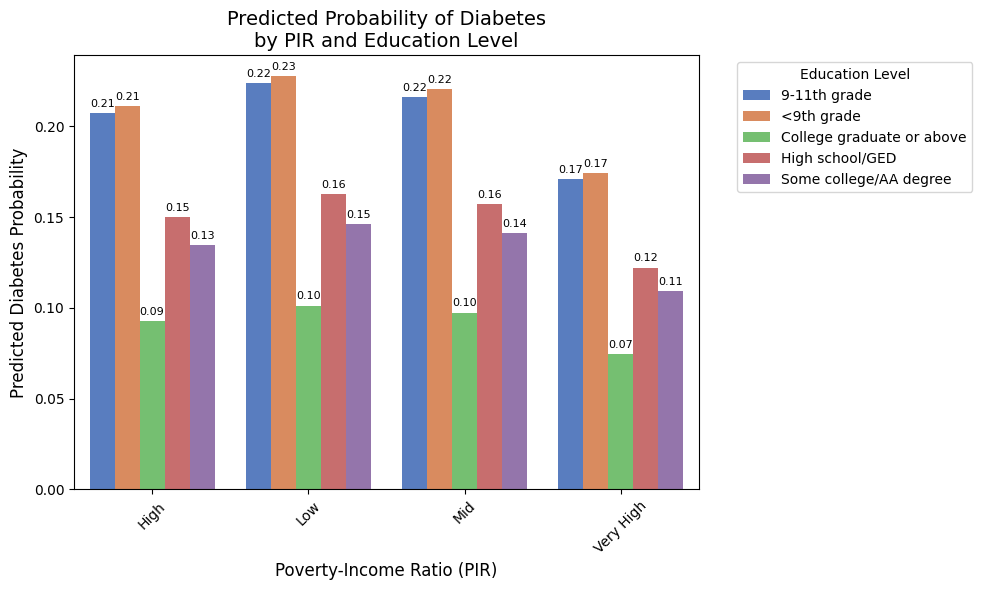

Diabetes probability by pir edu specific relationship plot saved to: outputs\plots\obj_1.3_diabetes_probability_by_pir_edu_specific_relationship.png


In [10]:
# --- Step 3: Create Prediction Grid ---

# Get all unique combinations of PIR and education
pir_levels = diabetes_data['pir_category'].cat.categories
edu_levels = diabetes_data['education_level'].cat.categories

# Average sleep used as constant across predictions
avg_sleep = diabetes_data['sleep_avg_hr'].mean()

# Create prediction input dataframe
pred_input = pd.DataFrame([
    {'sleep_avg_hr': avg_sleep, 'pir_category': pir, 'education_level': edu}
    for pir in pir_levels for edu in edu_levels
])

# Ensure categories match model
pred_input['pir_category'] = pd.Categorical(pred_input['pir_category'], categories=pir_levels)
pred_input['education_level'] = pd.Categorical(pred_input['education_level'], categories=edu_levels)

# Predict diabetes probability
pred_input['predicted_prob'] = results.predict(pred_input)

# Filter combos with no data (avoid showing unreliable predictions)
group_counts = diabetes_data.groupby(['pir_category', 'education_level'], observed=False).size().reset_index(name='count')
pred_input = pred_input.merge(group_counts, on=['pir_category', 'education_level'], how='left')
pred_input = pred_input[pred_input['count'].fillna(0) > 0]

# --- Step 4: Plotting ---

plt.figure(figsize=(10, 6))
sns.set_palette("muted")

plot = sns.barplot(
    data=pred_input,
    x='pir_category',
    y='predicted_prob',
    hue='education_level',
    errorbar=None
)

plt.title("Predicted Probability of Diabetes\nby PIR and Education Level", fontsize=14)
plt.ylabel("Predicted Diabetes Probability", fontsize=12)
plt.xlabel("Poverty-Income Ratio (PIR)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on top of each bar
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        plot.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=8,
            xytext=(0, 3),
            textcoords='offset points'
        )

# Save the plot to a file
plot_path = PLOTS_DIR/"obj_1.3_diabetes_probability_by_pir_edu_specific_relationship.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Diabetes probability by pir edu specific relationship plot saved to: {pretty_path(plot_path)}")

***NOTES:***

NHANES collects health data by dividing people into groups to make sure the results represent the whole U.S. population fairly. These groups are called strata and PSUs. Also, each person has a sample weight, which tells us how much they should count when we look at the big picture.

At first, I tried to include these groups (the strata) in my analysis to be more accurate. But it caused problems because the groups were too closely linked to other things in the data, making the analysis unstable. So instead, I left out the groups and used the sample weights along with a special method that helps make the results more reliable even without including all the group information.

Since NHANES only has two main big groups (PSUs), I couldn’t fully account for those either. So, it’s important to remember this when you’re looking at the results.